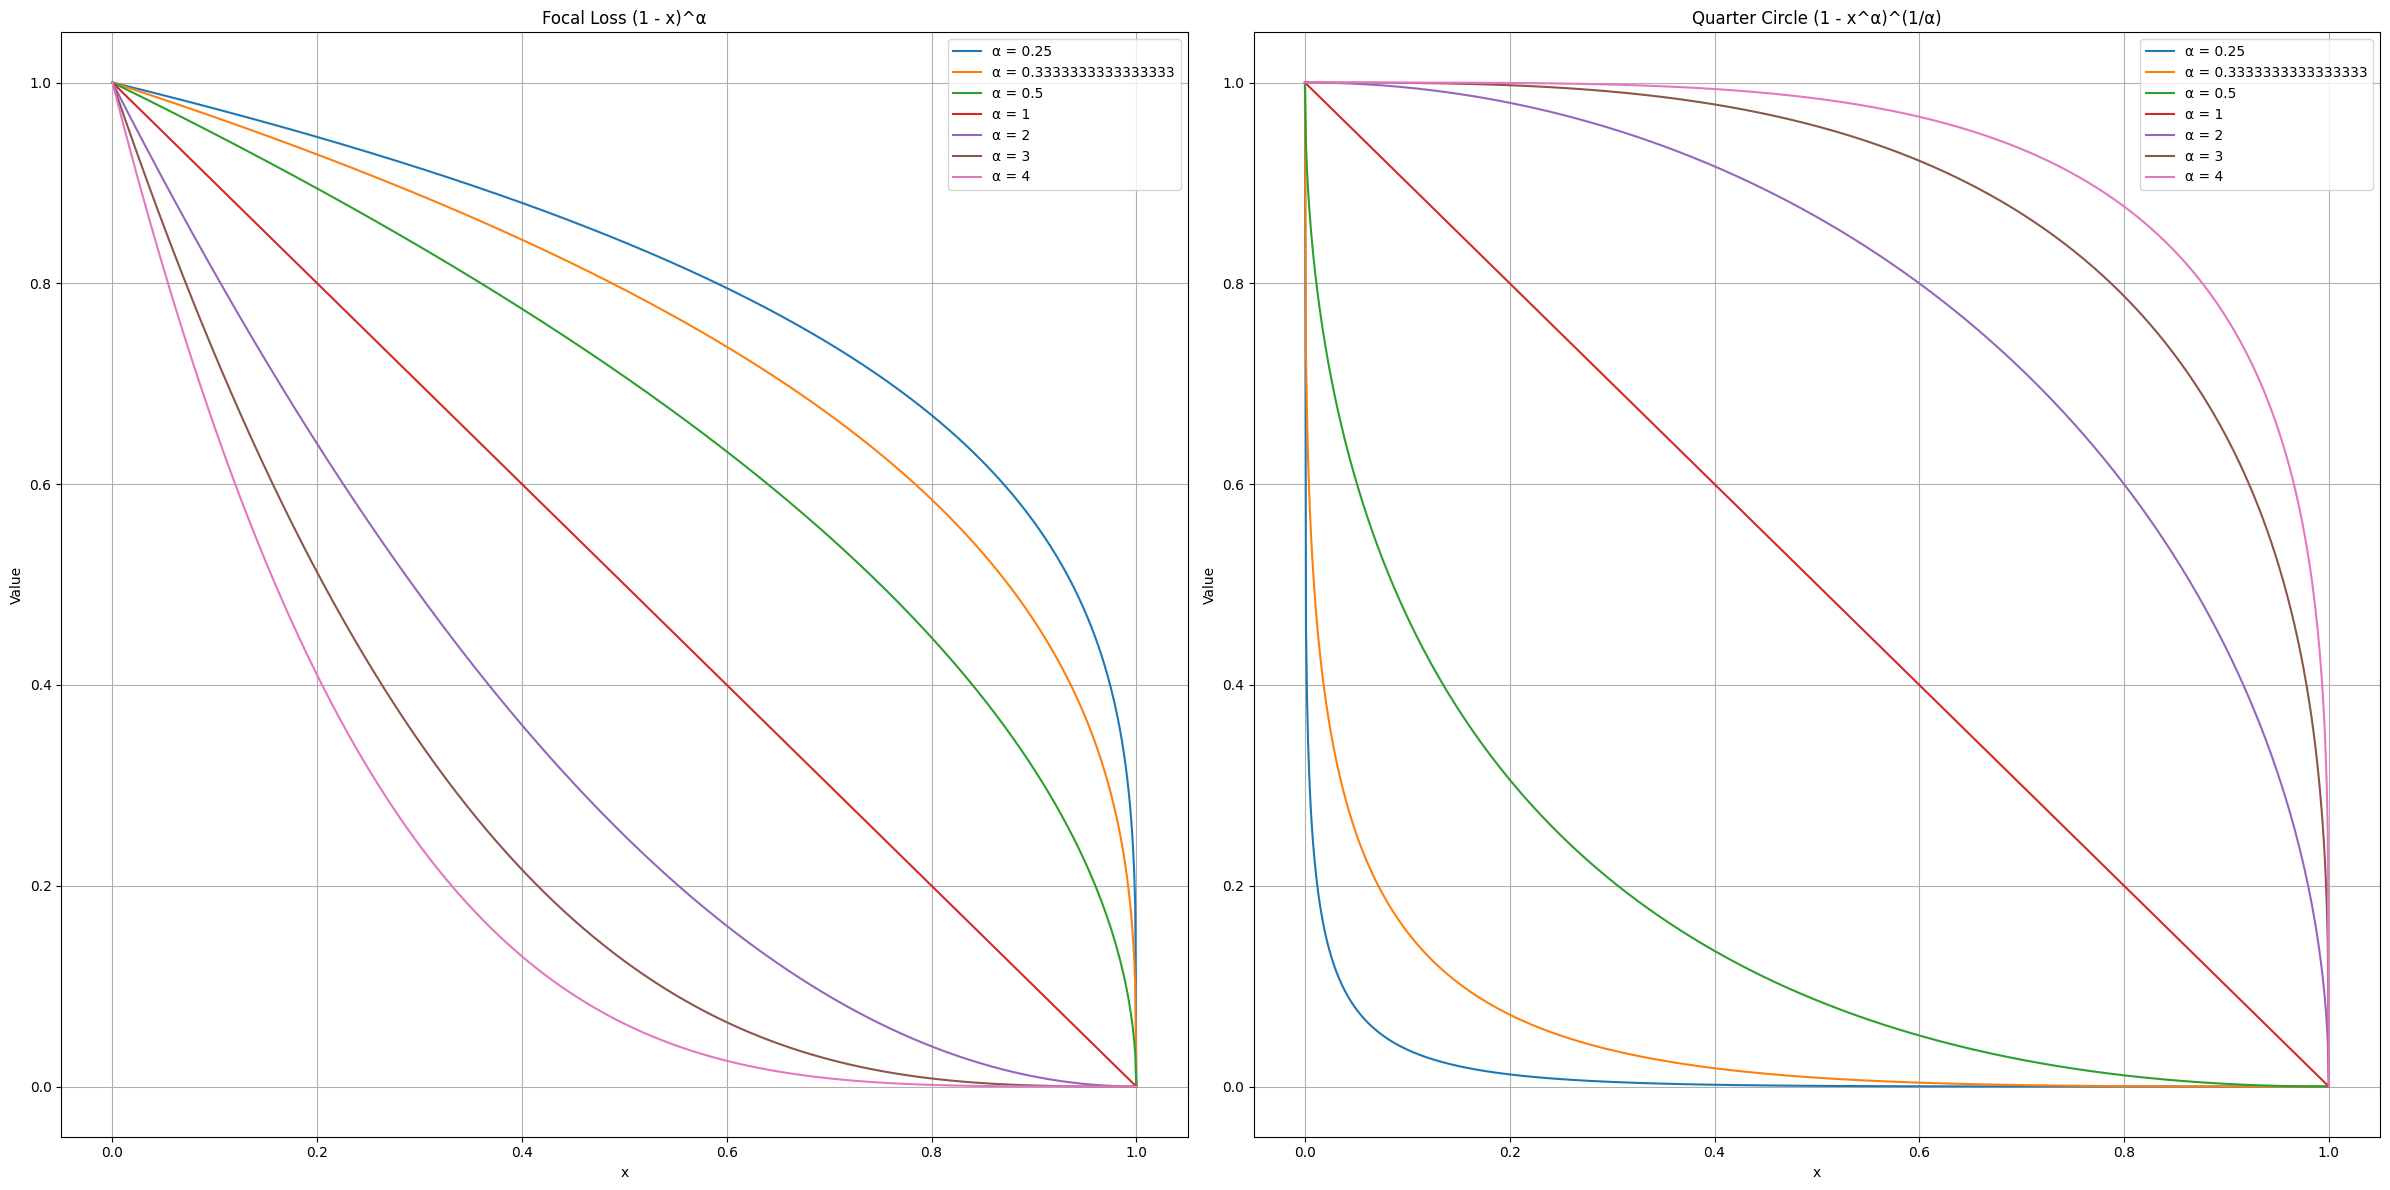

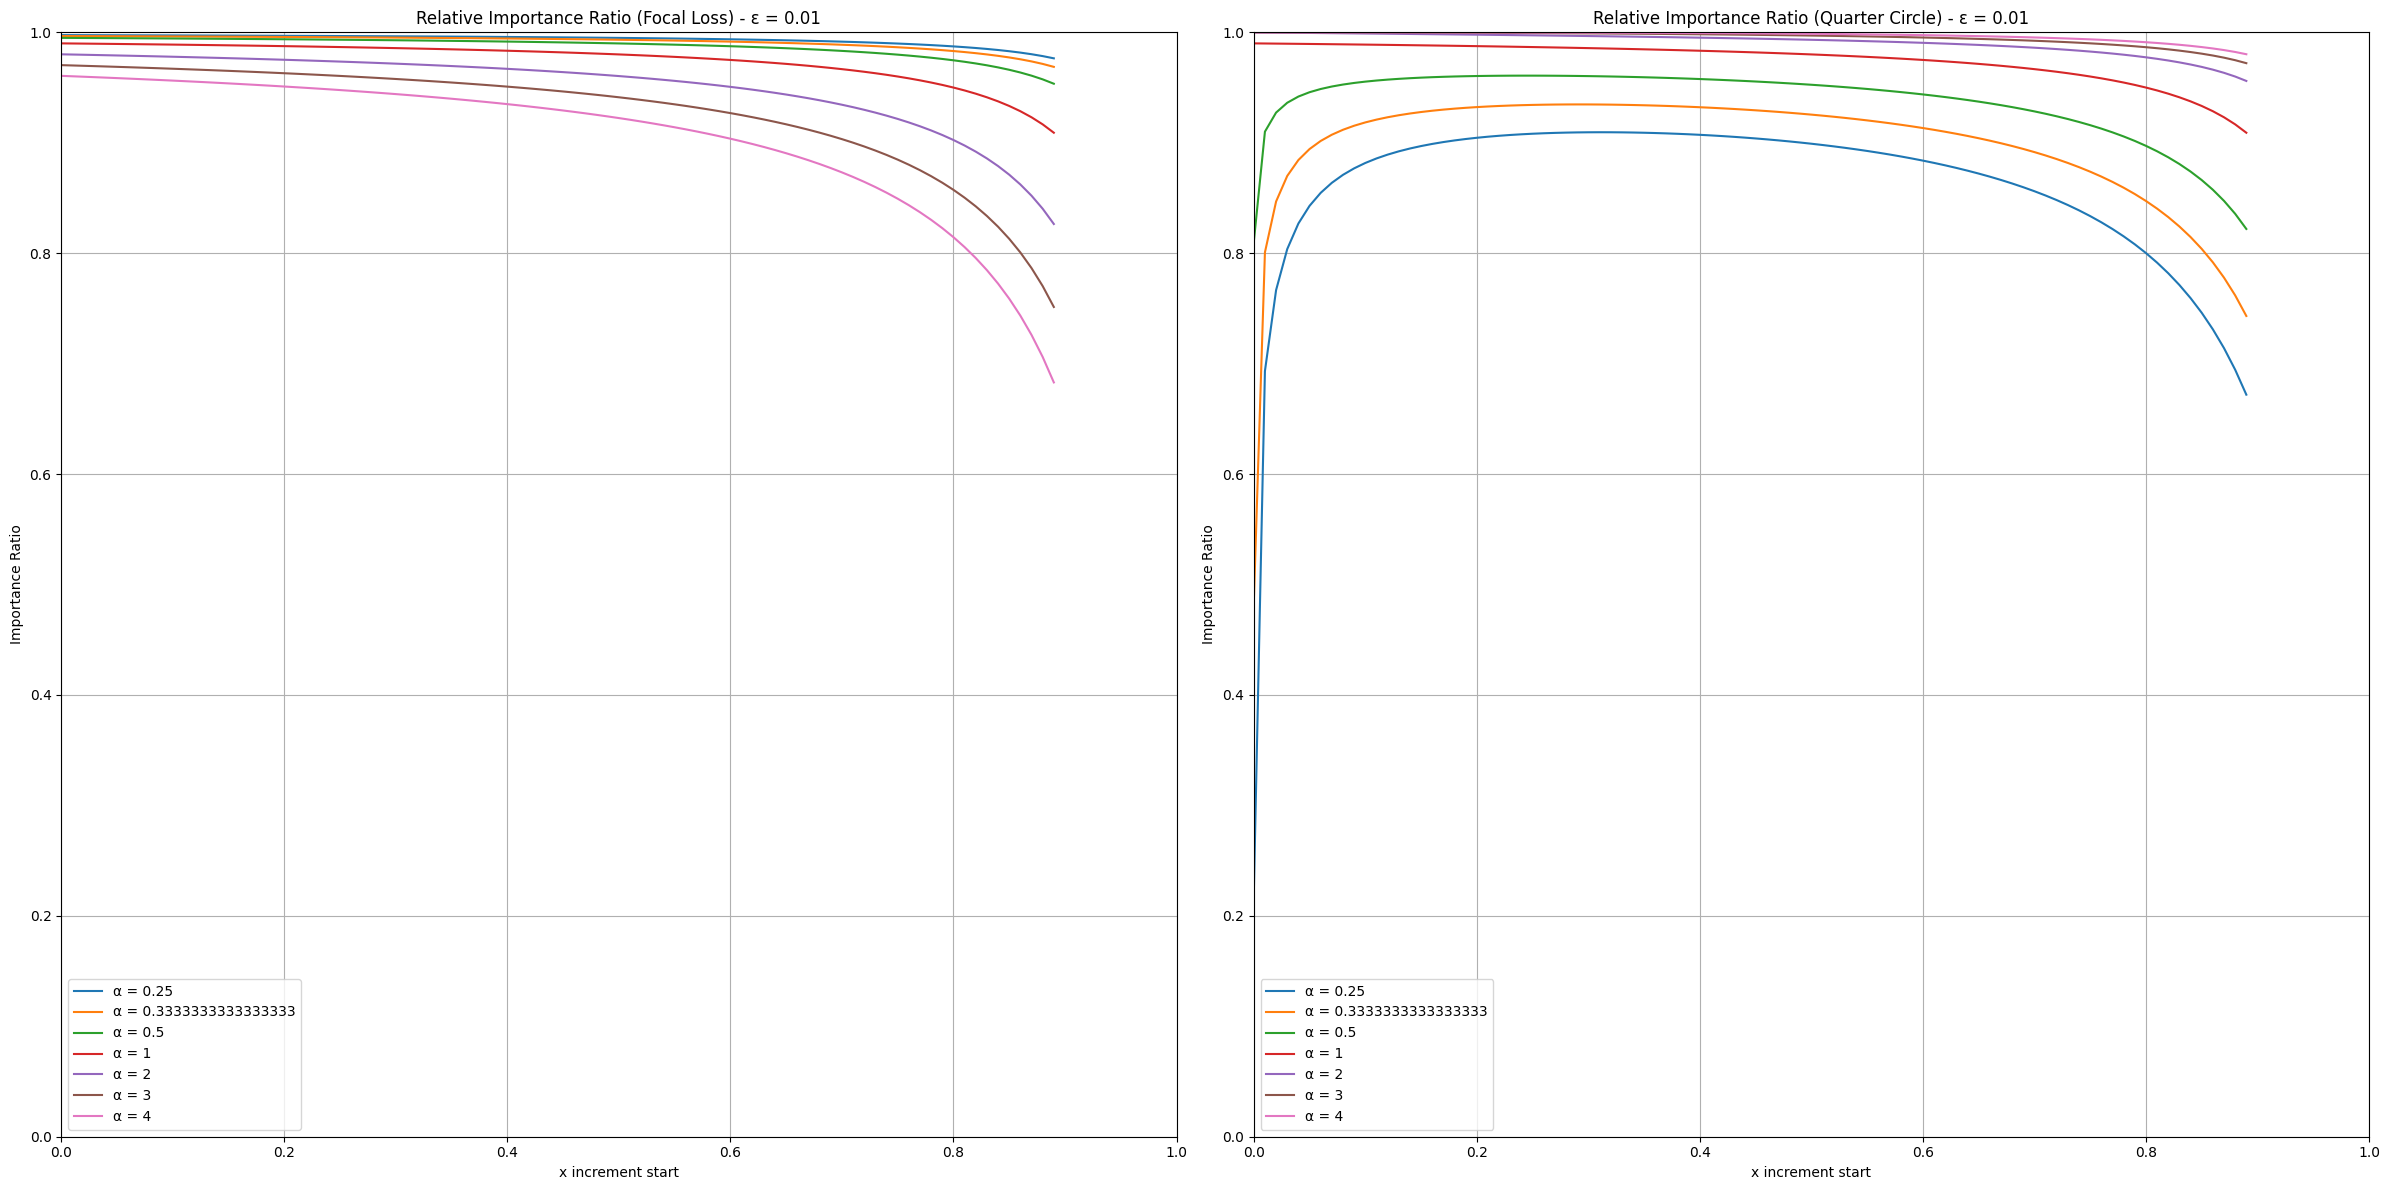

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range and alphas
x = np.linspace(0, 1, 1000)
# Updated alpha values
alphas = [1/4, 1/3, 1/2, 1, 2, 3, 4]

# Create a function for each loss type
def focal_loss(x, alpha):
    return (1 - x) ** alpha

def quarter_circle_loss(x, alpha):
    return (1 - x**alpha) ** (1/alpha)

def dense_loss(x, alpha):
    return 1 - alpha * x

# Option to include dense loss
include_dense = False  # Set to False to exclude dense loss
num_plots = 3 if include_dense else 2
fig_width = 36 if include_dense else 24

# Plot loss functions
fig, axes = plt.subplots(1, num_plots, figsize=(fig_width, 12))

for alpha in alphas:
    axes[0].plot(x, focal_loss(x, alpha), label=f'α = {alpha}')
    axes[1].plot(x, quarter_circle_loss(x, alpha), label=f'α = {alpha}')
    if include_dense:
        axes[2].plot(x, dense_loss(x, alpha), label=f'α = {alpha}')
    

axes[0].set_title("Focal Loss (1 - x)^α")
axes[0].set_xlabel("x")
axes[0].set_ylabel("Value")
axes[0].legend()
axes[0].grid(True)

axes[1].set_title("Quarter Circle (1 - x^α)^(1/α)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Value")
axes[1].legend()
axes[1].grid(True)

if include_dense:
    axes[2].set_title("Dense Loss (1 - α*x)")
    axes[2].set_xlabel("x")
    axes[2].set_ylabel("Value")
    axes[2].legend()
    axes[2].grid(True)

plt.tight_layout()
plt.show()

# Define epsilon as a parameter
epsilon = 0.01

# Calculate relative importance with configurable epsilon
increments = np.arange(0, 0.9, 0.01)

# Create functions for importance ratios
def importance_ratio_focal(increments, alpha, epsilon):
    return ((1 - (increments + epsilon)) ** alpha) / ((1 - increments) ** alpha)

def importance_ratio_quarter_circle(increments, alpha, epsilon):
    return ((1 - (increments + epsilon)**alpha)**(1/alpha)) / ((1 - increments**alpha)**(1/alpha))

def importance_ratio_dense(increments, alpha, epsilon):
    return (1 - alpha * (increments + epsilon)) / (1 - alpha * increments)

# Plot relative importance with option to include dense loss
fig, axes = plt.subplots(1, num_plots, figsize=(fig_width, 12))

for alpha in alphas:
    axes[0].plot(increments, importance_ratio_focal(increments, alpha, epsilon), label=f'α = {alpha}')
    axes[1].plot(increments, importance_ratio_quarter_circle(increments, alpha, epsilon), label=f'α = {alpha}')
    if include_dense:
        axes[2].plot(increments, importance_ratio_dense(increments, alpha, epsilon), label=f'α = {alpha}')

axes[0].set_title(f"Relative Importance Ratio (Focal Loss) - ε = {epsilon}")
axes[0].set_xlabel("x increment start")
axes[0].set_ylabel("Importance Ratio")
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, 1)
axes[0].legend()
axes[0].grid(True)

axes[1].set_title(f"Relative Importance Ratio (Quarter Circle) - ε = {epsilon}")
axes[1].set_xlabel("x increment start")
axes[1].set_ylabel("Importance Ratio")
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 1)
axes[1].legend()
axes[1].grid(True)

if include_dense:
    axes[2].set_title(f"Relative Importance Ratio (Dense Loss) - ε = {epsilon}")
    axes[2].set_xlabel("x increment start")
    axes[2].set_ylabel("Importance Ratio")
    axes[2].set_ylim(0, 1)
    axes[2].set_xlim(0, 1)
    axes[2].legend()
    axes[2].grid(True)

plt.tight_layout()
plt.show()
